In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('/home/dk/Data science/default of credit card clients.xls',header=1)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


To check percentage of defaulters and non defaulters

In [4]:
(data[data.columns[-1:][0]].value_counts()/len(data))*100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

# EDA 

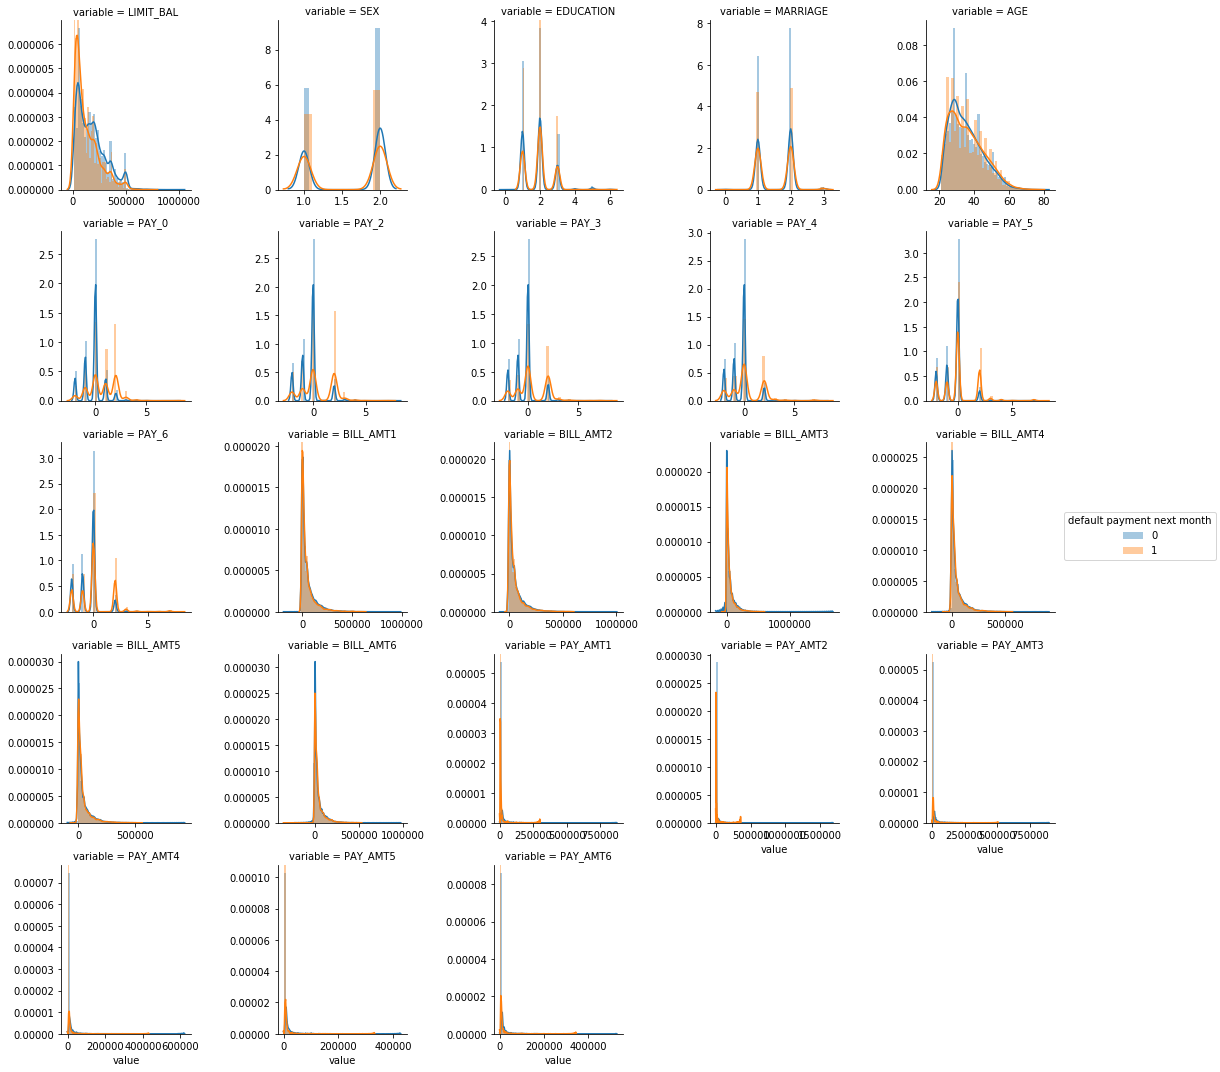

In [5]:
output = 'default payment next month'


cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove(output)

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()



1=Defaulters, 
1) Maximum freequency of defaulters are having less than 3.5 lac limit balance
2)  Maximum freequency of defaulters are having AGE between 35 to 40

[Text(0,0.5,'Percent')]

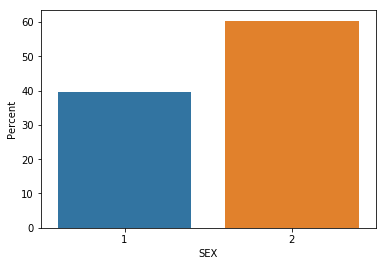

In [6]:
ax = sns.barplot(x='SEX', y='SEX', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

Data has 40% male and 60% female

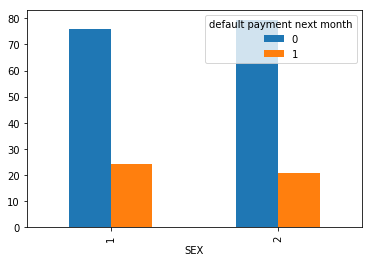

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(data['SEX'],data['default payment next month']).apply(lambda r: r/r.sum()*100, axis=1).plot(kind='bar')

In [8]:
pd.crosstab(data['SEX'],data['default payment next month']).apply(lambda r: r/r.sum()*100)

default payment next month,0,1
SEX,,
1,38.585003,43.294153
2,61.414997,56.705847


Distribution of the male : female in whole data is 4:6. Approx  same distribution is retained in non defaulters(0) but in defaulters it is not maintained, It means variable SEX is acting as discriminator for defaulters.

In [9]:
import scipy.stats
count=pd.crosstab(data['SEX'],data['default payment next month'])
scipy.stats.chi2_contingency(count)

(47.70879689062111, 4.944678999412044e-12, 1, array([[ 9258.3744,  2629.6256],
        [14105.6256,  4006.3744]]))

To check dependency of the SEX varibale towards target statistically chi square is conducted. p value is too less it indicates that nul hypo rejected. there is dependency between SEX and target variable.

In [10]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Level 5,6 and 0 are not expected in data , these are missing values. so better to consider in others category.

In [11]:
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

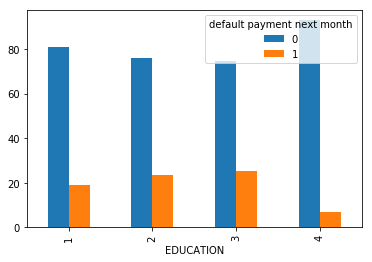

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(data['EDUCATION'],data['default payment next month']).apply(lambda r: r/r.sum()*100, axis=1).plot(kind='bar')

In [13]:
(data['EDUCATION'].value_counts()/np.sum(data['EDUCATION'].value_counts())).sort_index()

1    0.352833
2    0.467667
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64

In [14]:
pd.crosstab(data['EDUCATION'],data['default payment next month']).apply(lambda r: r/r.sum()*100)

default payment next month,0,1
EDUCATION,,
1,36.590481,30.681133
2,45.796953,50.180832
3,15.750728,18.640747
4,1.861839,0.497288


EDUCATION variable is acting as good diffrentiator for classification.

In [15]:
count1=pd.crosstab(data['EDUCATION'],data['default payment next month'])
scipy.stats.chi2_contingency(count1)

(160.40995107224546,
 1.4950645648106153e-34,
 3,
 array([[ 8243.598 ,  2341.402 ],
        [10926.564 ,  3103.436 ],
        [ 3829.3596,  1087.6404],
        [  364.4784,   103.5216]]))

There is dependency between EDUCATION and target variable, P- value is less than 0.05.

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('LIMIT_BAL ~ EDUCATION',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq       df            F  PR(>F)
EDUCATION  2.696863e+13      1.0  1692.308385     0.0
Residual   4.780482e+14  29998.0          NaN     NaN


ANOVA is conducted to understand mean limit balance is same across EDUCATION category or not . NUll is rejected , so mean limit balance is different across different education category.

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['LIMIT_BAL'], data['EDUCATION'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
  1      2    -65893.6323 -70029.3312 -61757.9334  True 
  1      3    -86405.7994 -91949.7786 -80861.8203  True 
  1      4    -31639.8306 -46813.6526 -16466.0086  True 
  2      3    -20512.1671  -25835.879 -15188.4552  True 
  2      4     34253.8017  19159.0649  49348.5384  True 
  3      4     54765.9688  39226.2527  70305.6849  True 
--------------------------------------------------------
[1 2 3 4]


Level-1 is highly educated people, so we would expect to have high limit balance, but it is not.limit balance is more for students Level-3.

In [18]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

0 is not expected , it might be null value.so consider in others category.

In [19]:
fil = (data.MARRIAGE == 0) 
data.loc[fil, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

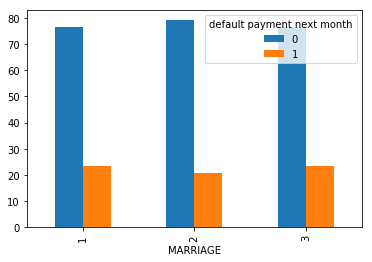

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(data['MARRIAGE'],data['default payment next month']).apply(lambda r: r/r.sum()*100, axis=1).plot(kind='bar')

In [21]:
import scipy.stats
count=pd.crosstab(data['MARRIAGE'],data['default payment next month'])
scipy.stats.chi2_contingency(count)

(28.13032464482199, 7.790720364202813e-07, 2, array([[10637.6292,  3021.3708],
        [12432.7632,  3531.2368],
        [  293.6076,    83.3924]]))

THere is dependency between MARRIAGE variable and target variable. p-value is less than 0.05

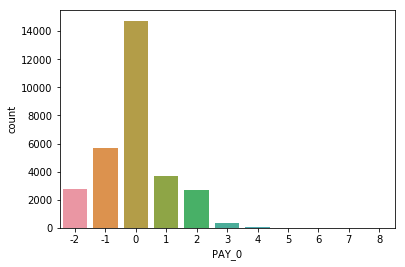

In [22]:
sns.countplot(x='PAY_0',data=data)

0 and -2 is not desired in data. data has 40% of these values. we can discard or use it for creating new features.

In [100]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Duly_payer', 'Fallible_payer',
       'Monitor_payer', 'No_transact', 'Totalbillamount',
       'Totalpaymentamount'],
      dtype='object')

In [23]:
df_continuos=data.drop(['ID','SEX', 'EDUCATION', 'MARRIAGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],axis=1)
df_category=data.drop(['ID','LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1)

In [24]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Feature engineering

In [25]:
data.loc[:,'PAY_0']=data.loc[:,'PAY_0']+1
data['Duly_payer']=np.where((data['PAY_0']==-1)&(data['PAY_2']==-1)&(data['PAY_3']==-1)&(data['PAY_4']==-1)&(data['PAY_5']==-1)&(data['PAY_6']==-1),1,0)
data['Fallible_payer']=np.where((data['PAY_0']>0)&(data['PAY_2']>0)&(data['PAY_3']>0)&(data['PAY_4']>0)&(data['PAY_5']>0)&(data['PAY_6']>0),1,0)
data['Monitor_payer']=np.where((data['PAY_0']+data['PAY_2']+data['PAY_3']+data['PAY_4']+data['PAY_5']+data['PAY_6'])>=6,1,0)
data['No_transact']=np.where((data['PAY_0']==0)&(data['PAY_2']==0)&(data['PAY_3']==0)&(data['PAY_4']==0)&(data['PAY_5']==0)&(data['PAY_6']==0),1,0)

Description for PAY_0 to PAY_6(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

Duly_payer = One who pays every month (PAY_0 (September, 2005 )to PAY_6(April, 2005) without delay.
Falliable_payer=One who delay every month
Monitor_payer= whoose sum across six payments is more than 6 is Serious threat to the bank 
NO_tranct= customers not completed any transaction

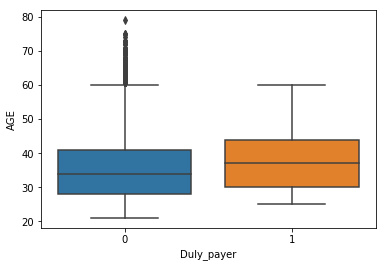

In [102]:
sns.boxplot(data['Duly_payer'],data['AGE'])

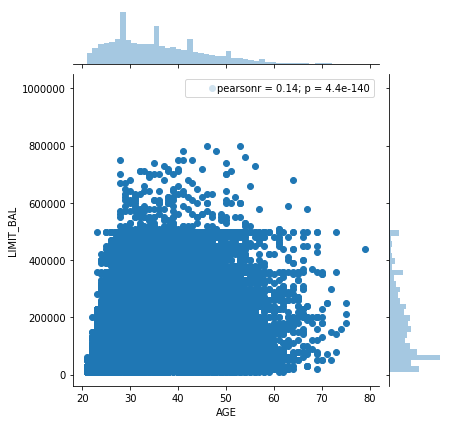

In [105]:
sns.jointplot(data['AGE'],data['LIMIT_BAL'])

maximum proportion of customers having limit balance less than 4.5lac and AGE is less thyan 60

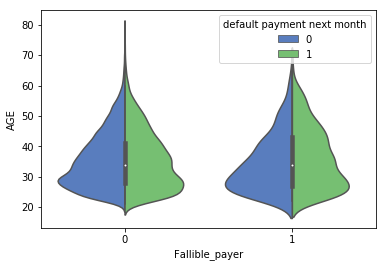

In [109]:
sns.violinplot(data['Fallible_payer'],data['AGE'],hue=data['default payment next month'],palette="muted", split=True)

In [27]:
#df['DUE_1']=df['BILL_AMT1']-df['PAY_AMT1']
#df['DUE_2']=df['BILL_AMT2']-df['PAY_AMT2']
#df['DUE_3']=df['BILL_AMT3']-df['PAY_AMT3']
#df['DUE_4']=df['BILL_AMT4']-df['PAY_AMT4']
#df['DUE_5']=df['BILL_AMT5']-df['PAY_AMT5']
#df['DUE_6']=df['BILL_AMT6']-df['PAY_AMT6']

Above are set of variables created but due to high correlation between these variables these are not processed further.

In [28]:
data['Totalbillamount']=data['BILL_AMT1']+data['BILL_AMT2']+data['BILL_AMT3']+data['BILL_AMT4']+data['BILL_AMT5']+data['BILL_AMT6']
data['Totalpaymentamount']=data['PAY_AMT1']+data['PAY_AMT2']+data['PAY_AMT3']+data['PAY_AMT4']+data['PAY_AMT5']+data['PAY_AMT6']

Above are aggregated varibles for bill and payment. Instead individually processing BILL_AMT1 to BILL_AMT6, it is better to capture the essence in as ingle varible.

In [29]:
x=data.drop(['ID','default payment next month','PAY_0',
       'PAY_2','SEX','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6','EDUCATION','MARRIAGE'],axis=1)
y=data['default payment next month']

In [30]:
x.head()

,LIMIT_BAL,AGE,Duly_payer,Fallible_payer,Monitor_payer,No_transact,Totalbillamount,Totalpaymentamount
0,20000,24,0,0,0,0,7704,689
1,120000,26,0,0,0,0,17077,5000
2,90000,34,0,0,0,0,101653,11018
3,50000,37,0,0,0,0,231334,8388
4,50000,57,0,0,0,0,109339,59049


# EDA for New features

In [31]:
pair=data[['Totalbillamount','Totalpaymentamount','default payment next month']]

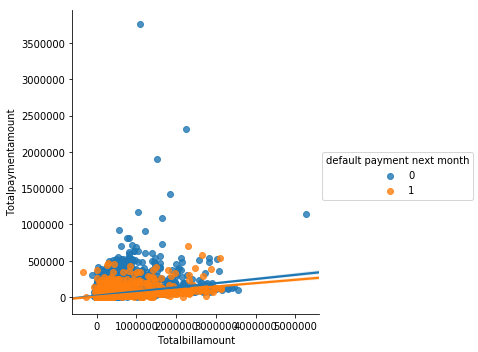

In [32]:
sns.lmplot(x='Totalbillamount', y='Totalpaymentamount', hue='default payment next month', data=data)

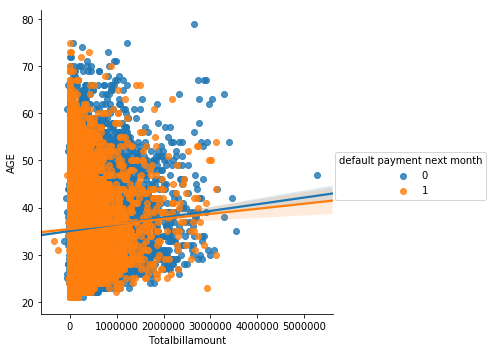

In [33]:
sns.lmplot(x='Totalbillamount', y='AGE', hue='default payment next month', data=data)

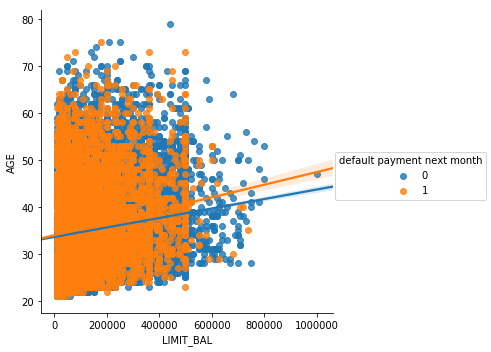

In [34]:
sns.lmplot(x='LIMIT_BAL', y='AGE', hue='default payment next month', data=data)

# Logistic regression

In [35]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=28)

In [36]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
result=logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)
logis_score_train = logreg.score(x_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logreg.score(x_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.7765671641791044
Testing score:  0.7833333333333333


In [37]:
import statsmodels.api as sm
logit = sm.Logit(y_train,x_train)

# fit the model
result = logit.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.486194
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                20100
Model:                                  Logit   Df Residuals:                    20092
Method:                                   MLE   Df Model:                            7
Date:                        Thu, 06 Sep 2018   Pseudo R-squ.:                 0.08476
Time:                                11:15:31   Log-Likelihood:                -9772.5
converged:                               True   LL-Null:                       -10677.
                                                LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
LIMIT_BAL          -1.992e-0

In [38]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [39]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y_predict)

array([[7755,    0],
       [2145,    0]])

Due to imbalance model is not able to predict defaulters so, under and over sampling techniques has to be applied to this data. This is done in another file.

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.4392523364485982
0.39166666666666666
0.5


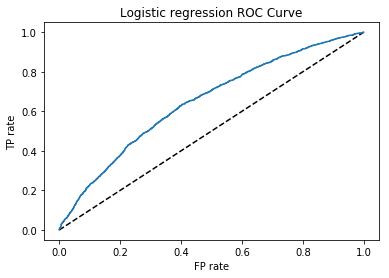

0.6484675651019945

In [41]:
#ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prop=logreg.predict_proba(x_test)[:,1] #Filter column of prob leaving target
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prop)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Logistic regression ROC Curve')
plt.show()
#AUC of ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prop)

# KNN

In [42]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
scalar.fit(x_test)
x1_train=scalar.transform(x_train)
x1_test=scalar.transform(x_test)

Text(0,0.5,'Accuracy')

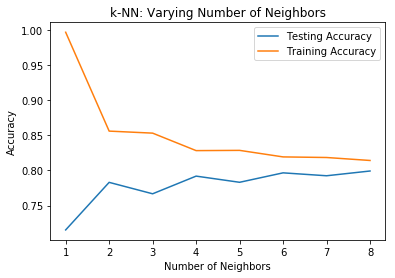

In [43]:
from sklearn.neighbors import KNeighborsClassifier
#Finding best k -value
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn_1=KNeighborsClassifier(n_neighbors=k)
    knn_1.fit(x1_train,y_train)
    train_accuracy[i]=knn_1.score(x1_train,y_train)
    test_accuracy[i]=knn_1.score(x1_test,y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

In [44]:
knn=KNeighborsClassifier(n_neighbors=6)
result1=knn.fit(x_train,y_train)
train_accuracy=knn.score(x_train,y_train)
test_accuracy=knn.score(x_test,y_test)
print(train_accuracy)
print(test_accuracy)

0.7985074626865671
0.7703030303030303


In [45]:
y1_predict=result1.predict(x_test)

In [46]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y1_predict)

array([[7448,  307],
       [1967,  178]])

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y1_predict, average="macro"))
print(precision_score(y_test, y1_predict, average="macro"))
print(recall_score(y_test, y1_predict, average="macro"))
print(classification_report(y_test, y1_predict))

0.5014604569381116
0.5790441880964243
0.5216981599960323
             precision    recall  f1-score   support

          0       0.79      0.96      0.87      7755
          1       0.37      0.08      0.14      2145

avg / total       0.70      0.77      0.71      9900



Though overall F1-score is satisfactory,F1-score related to defaluters(1) is 0.14 is too low. So further in order to improve this over and under sampling techquies has to be applied.

In [48]:
df_train=data[['LIMIT_BAL','AGE','Duly_payer','Fallible_payer','Monitor_payer','No_transact','Totalbillamount','Totalpaymentamount','default payment next month']]
df_test=x_test

In [49]:
count_class_0, count_class_1 = df_train['default payment next month'].value_counts()

In [50]:
df_class_0 = df_train[df_train['default payment next month'] == 0]
df_class_1 = df_train[df_train['default payment next month'] == 1]

# K-nn(Random Under sampling)

In [51]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
1    6636
0    6636
Name: default payment next month, dtype: int64


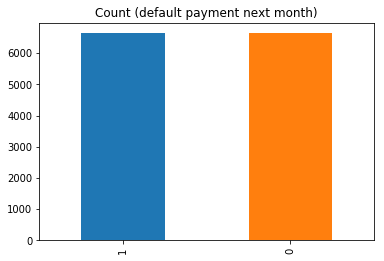

In [52]:
print('Random under-sampling:')
print(df_test_under['default payment next month'].value_counts())

df_test_under['default payment next month'].value_counts().plot(kind='bar', title='Count (default payment next month)')

In [53]:
x_under_train=df_test_under.drop(['default payment next month'],axis=1)
x_under_test=df_test_under['default payment next month']

In [54]:
#Splitting data
from sklearn.model_selection import train_test_split
x_under_train,x_under_test,y_under_train,y_under_test = train_test_split(x_under_train,x_under_test,test_size=0.33,random_state=29)

In [55]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_under_train)
scalar.fit(x_under_test)
x1_under_train=scalar.transform(x_under_train)
x1_under_test=scalar.transform(x_under_test)

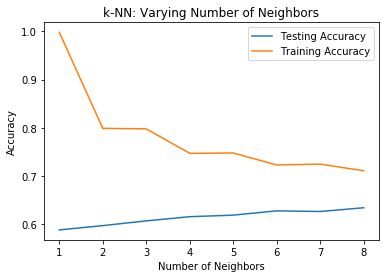

In [56]:
from sklearn.neighbors import KNeighborsClassifier
#Finding best k -value
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn_1=KNeighborsClassifier(n_neighbors=k)
    knn_1.fit(x1_under_train,y_under_train)
    train_accuracy[i]=knn_1.score(x1_under_train,y_under_train)
    test_accuracy[i]=knn_1.score(x1_under_test,y_under_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [57]:
knn=KNeighborsClassifier(n_neighbors=8)
result_under=knn.fit(x_under_train,y_under_train)
train_accuracy=knn.score(x1_under_train,y_under_train)
test_accuracy=knn.score(x1_under_test,y_under_test)
print(train_accuracy)
print(test_accuracy)

0.497638326585695
0.5047945205479452


In [58]:
y1_under_predict=result_under.predict(x1_under_test)

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_under_test, y1_under_predict, average="macro"))
print(precision_score(y_under_test, y1_under_predict, average="macro"))
print(recall_score(y_under_test, y1_under_predict, average="macro"))
print(classification_report(y_under_test, y1_under_predict))

0.33545744196631766
0.2523972602739726
0.5
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2169
          1       0.50      1.00      0.67      2211

avg / total       0.25      0.50      0.34      4380



Random under sampling has not improved scores much. so proceed further with random over sampling

# K-nn(Random over sampling)

Random over-sampling:
1    23364
0    23364
Name: default payment next month, dtype: int64


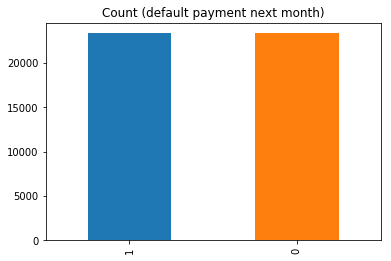

In [60]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['default payment next month'].value_counts())

df_test_over['default payment next month'].value_counts().plot(kind='bar', title='Count (default payment next month)')

In [61]:
x_over_train=df_test_over.drop(['default payment next month'],axis=1)
x_over_test=df_test_over['default payment next month']

In [62]:
#Splitting data
from sklearn.model_selection import train_test_split
x_over_train,x_over_test,y_over_train,y_over_test = train_test_split(x_over_train,x_over_test,test_size=0.33,random_state=30)

In [63]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_over_train)
scalar.fit(x_over_test)
x1_over_train=scalar.transform(x_over_train)
x1_over_test=scalar.transform(x_over_test)

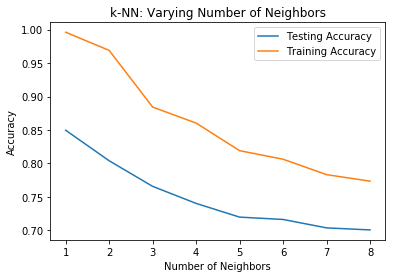

In [64]:
from sklearn.neighbors import KNeighborsClassifier
#Finding best k -value
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn_1=KNeighborsClassifier(n_neighbors=k)
    knn_1.fit(x1_over_train,y_over_train)
    train_accuracy[i]=knn_1.score(x1_over_train,y_over_train)
    test_accuracy[i]=knn_1.score(x1_over_test,y_over_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [65]:
knn=KNeighborsClassifier(n_neighbors=3)
result_over=knn.fit(x1_over_train,y_over_train)
train_accuracy=knn.score(x1_over_train,y_over_train)
test_accuracy=knn.score(x1_over_test,y_over_test)
print(train_accuracy)
print(test_accuracy)

0.8843070239882455
0.7658387912586733


In [66]:
y1_over_predict=result_over.predict(x1_over_test)

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_over_test, y1_over_predict, average="macro"))
print(precision_score(y_over_test, y1_over_predict, average="macro"))
print(recall_score(y_over_test, y1_over_predict, average="macro"))
print(classification_report(y_over_test, y1_over_predict))

0.7639318435036346
0.776901735670618
0.7668882485061318
             precision    recall  f1-score   support

          0       0.83      0.67      0.74      7793
          1       0.72      0.86      0.79      7628

avg / total       0.78      0.77      0.76     15421



Random over sampling has worked well this data. It has improved F1-score and accuracy of the model.

# Decision tree

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Performing GRIDSEARCHCV to identify best parameters.

In [69]:
param_dist = {"max_depth": [3,4,5,6],
              "max_features": np.arange(1, 9),
              "min_samples_leaf": np.arange(1, 9),
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(tree,param_dist, cv=6)
tree_cv.fit(x_train,y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5}
Best score is 0.8025373134328359


Buiding the model with tuned parameters.

In [70]:
#Building decision tree with otimized parameters
tree_1 = DecisionTreeClassifier(max_depth=5,
              max_features=7,
              min_samples_leaf=7,
              criterion="gini")
tree_1.fit(x_train,y_train)
y_pred=tree_1.predict(x_test)
y_pred_train1=tree_1.predict(x_train)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_train,y_pred_train1))

[[7325  430]
 [1428  717]]
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      7755
          1       0.63      0.33      0.44      2145

avg / total       0.79      0.81      0.79      9900

0.8123232323232323
0.8038805970149254


In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.6615249839468091
0.7309824575278263
0.6394088181322224


In [72]:
from IPython.display import Image  
import pydotplus
from sklearn import tree
from IPython.display import SVG
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot
from io import StringIO

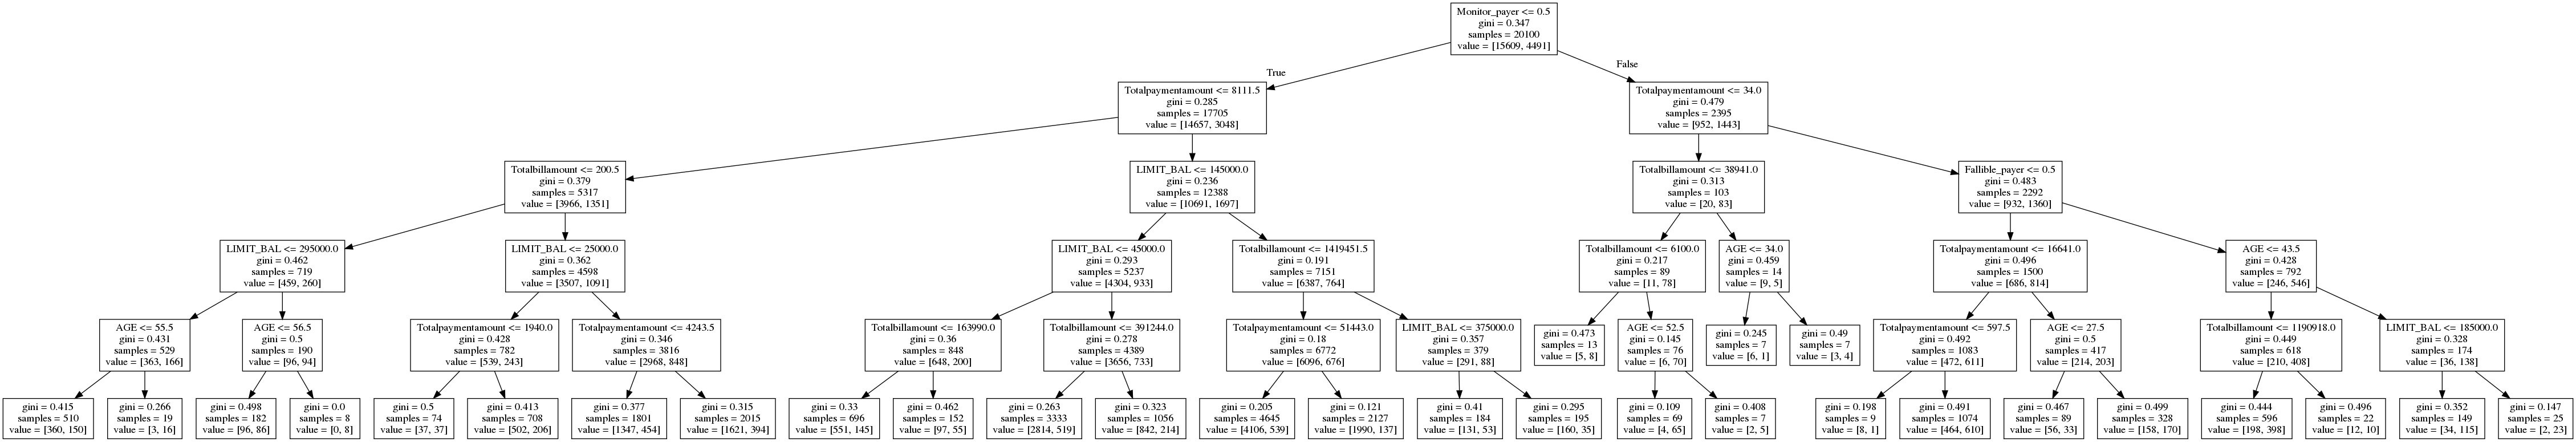

In [73]:
dot_data = StringIO()  
export_graphviz(tree_1, out_file=dot_data, 
                                feature_names=x_train.columns)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png()) 


In [74]:
graph.write_pdf("credit_default.pdf")

In [75]:
from ipywidgets import interactive

In [76]:
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    dot_data1 = StringIO() 
    estimator = DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator.fit(x_train, y_train)
    export_graphviz(estimator
      , out_file=dot_data1
      , feature_names=x_train.columns)
     
    graph = pydot.graph_from_dot_data(dot_data1.getvalue())[0]  
    print(display(Image(graph.create_png())))
  
    return estimator
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Performing boosting on decision tree.

Accuracy of the GBM on test set: 0.811
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      7755
          1       0.63      0.30      0.41      2145

avg / total       0.79      0.81      0.78      9900



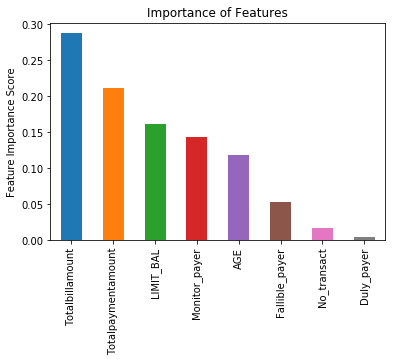

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
booster1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
booster1.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(booster1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(booster1.score(x_test, y_test)))
pred=booster1.predict(x_test)
print(classification_report(y_test, pred))

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state = 42)

In [79]:
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 8),
              "min_samples_split":randint(2, 11),
              "min_samples_leaf":randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

RandomserachCV to identify best parameters.

In [80]:
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 3)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f602f1399e8>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f602f139588>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6034858a90>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          r

In [81]:
random_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 10}

Building a random forest with tuned parameters.

In [82]:
rf1= RandomForestClassifier(random_state = 42,max_depth=3,
              max_features=6,
              min_samples_split=2,
              min_samples_leaf=5,
              bootstrap=True,
              criterion="gini")
rf1.fit(x_train,y_train)
y_pred_=rf1.predict(x_test)
y_pred_train=rf1.predict(x_train)
print(confusion_matrix(y_test,y_pred_))
print(classification_report(y_test,y_pred_))
print(accuracy_score(y_test,y_pred_))
print(accuracy_score(y_train,y_pred_train))

[[7312  443]
 [1421  724]]
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      7755
          1       0.62      0.34      0.44      2145

avg / total       0.79      0.81      0.79      9900

0.8117171717171717
0.8016915422885572


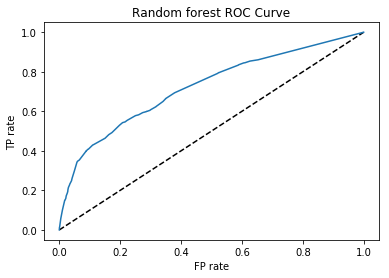

0.7211154845584246

In [83]:
#ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prop_=rf1.predict_proba(x_test)[:,1] #Filter column of prob leaving target
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prop_)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Random forest ROC Curve')
plt.show()
#AUC of ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prop_)

# SVM

In [84]:
from sklearn.svm import LinearSVC
svm_model= LinearSVC(C=1, random_state=0)
svm_model.fit(x_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [85]:
y_pred_svm=svm_model.predict(x_test)
y_pred_svm1=svm_model.predict(x_train)

In [86]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred_svm, average="macro"))
print(precision_score(y_test, y_pred_svm, average="macro"))
print(recall_score(y_test, y_pred_svm, average="macro"))
print(classification_report(y_test, y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(accuracy_score(y_train,y_pred_svm1))

0.4588624368011629
0.4727059138907572
0.4635322124683827
             precision    recall  f1-score   support

          0       0.76      0.64      0.69      7755
          1       0.18      0.29      0.22      2145

avg / total       0.64      0.56      0.59      9900

0.5616161616161616
0.5654228855721393


In [87]:
svm_model.coef_

array([[ 6.28159787e-06, -4.36795778e-04,  2.04263609e-08,
         1.42283205e-04,  1.78774277e-04, -2.10906513e-06,
        -5.84519006e-06, -1.48558198e-05]])

# Gausian Kernel

In [88]:
from sklearn.svm import SVC
svm_model1= SVC(C=1, random_state=1,kernel='rbf')
svm_model1.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
y_pred_svm2=svm_model1.predict(x_test)
y_pred_svm3=svm_model1.predict(x_train)

In [90]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred_svm2, average="macro"))
print(precision_score(y_test, y_pred_svm2, average="macro"))
print(recall_score(y_test, y_pred_svm2, average="macro"))
print(classification_report(y_test, y_pred_svm2))
print(accuracy_score(y_test,y_pred_svm2))
print(accuracy_score(y_train,y_pred_svm3))

0.45335227272727274
0.6744540375825292
0.5056787184446759
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7755
          1       0.56      0.01      0.03      2145

avg / total       0.74      0.78      0.69      9900

0.7840404040404041
0.9942288557213931


# Sigmoid Kernel

In [91]:
from sklearn.svm import SVC
svm_model2= SVC(C=1, random_state=1,kernel='sigmoid')
svm_model2.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
y_pred_svm4=svm_model2.predict(x_test)
y_pred_svm5=svm_model2.predict(x_train)

In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred_svm4, average="macro"))
print(precision_score(y_test, y_pred_svm4, average="macro"))
print(recall_score(y_test, y_pred_svm4, average="macro"))
print(classification_report(y_test, y_pred_svm4))
print(accuracy_score(y_test,y_pred_svm4))
print(accuracy_score(y_train,y_pred_svm5))

0.5617690037785457
0.5597249720587085
0.5656598720428507
             precision    recall  f1-score   support

          0       0.81      0.78      0.80      7755
          1       0.31      0.35      0.33      2145

avg / total       0.70      0.69      0.69      9900

0.6872727272727273
0.6788059701492537


# SVM rbf and over sampling

In [94]:
from sklearn.svm import SVC
svm_model3= SVC(C=1, random_state=1,kernel='rbf')
svm_model3.fit(x_over_train, y_over_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
y_pred_svm5=svm_model3.predict(x_test)
y_pred_svm6=svm_model3.predict(x_over_train)

In [96]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred_svm5, average="macro"))
print(precision_score(y_test, y_pred_svm5, average="macro"))
print(recall_score(y_test, y_pred_svm5, average="macro"))
print(classification_report(y_test, y_pred_svm5))
print(accuracy_score(y_test,y_pred_svm5))
print(accuracy_score(y_over_train,y_pred_svm6))

0.959871793635632
0.970370633666969
0.95026533749938
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      7755
          1       0.97      0.91      0.94      2145

avg / total       0.97      0.97      0.97      9900

0.9733333333333334
0.9946337879707414


# Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
gnb = GaussianNB()
gnb_model=gnb.fit(x_train,y_train)
y_prd_gnb=gnb_model.predict(x_test)
y_prd_gnbt=gnb_model.predict(x_train)

In [99]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_prd_gnb, average="macro"))
print(precision_score(y_test, y_prd_gnb, average="macro"))
print(recall_score(y_test, y_prd_gnb, average="macro"))
print(classification_report(y_test, y_prd_gnb))
print(accuracy_score(y_test,y_prd_gnb))
print(accuracy_score(y_train,y_prd_gnbt))

0.4392523364485982
0.39166666666666666
0.5
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      7755
          1       0.00      0.00      0.00      2145

avg / total       0.61      0.78      0.69      9900

0.7833333333333333
0.7765671641791044
